<a href="https://colab.research.google.com/github/Poorya0071/GAN_MNIST/blob/main/GAN_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### This project aims to learn the GAN architecture with a straightforward example, MNIST data set.




Let's import required libraries.

In [1]:
import zipfile
import numpy as np
import tensorflow as tf
import matplotlib.pyplot  as plt
import time
import os
import random
import matplotlib.image as mpimg
from tensorflow import keras
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Conv2D, LeakyReLU, Flatten, Dropout, Dense, Conv2DTranspose, BatchNormalization , Input, UpSampling2D, Reshape
from tensorflow.keras.models import Model

Let's define the GAN class.

1/1 [==============================] - 0s 485ms/step
0 [D loss: 7.148945, acc.: 50.00%] [G loss: 8.561026]
1/1 [==============================] - 0s 186ms/step


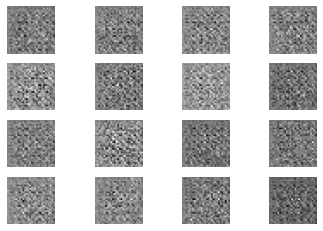

1/1 [==============================] - 0s 155ms/step
1 [D loss: 4.114983, acc.: 50.00%] [G loss: 5.974312]
1/1 [==============================] - 0s 148ms/step
2 [D loss: 1.707952, acc.: 50.00%] [G loss: 2.824780]
1/1 [==============================] - 0s 154ms/step
3 [D loss: 0.688236, acc.: 51.56%] [G loss: 2.052274]
1/1 [==============================] - 0s 149ms/step
4 [D loss: 0.571092, acc.: 54.69%] [G loss: 1.739949]
1/1 [==============================] - 0s 149ms/step
5 [D loss: 0.432910, acc.: 62.50%] [G loss: 1.454874]
1/1 [==============================] - 0s 213ms/step
6 [D loss: 0.406309, acc.: 71.88%] [G loss: 1.357035]
1/1 [==============================] - 0s 331ms/step
7 [D loss: 0.337932, acc.: 89.06%] [G loss: 1.202437]
1/1 [==============================] - 0s 149ms/step
8 [D loss: 0.302022, acc.: 96.88%] [G loss: 1.103739]
1/1 [==============================] - 0s 310ms/step
9 [D loss: 0.281795, acc.: 100.00%] [G loss: 1.068922]
1/1 [==============================]

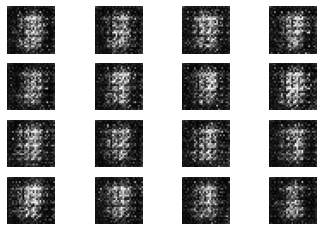

1/1 [==============================] - 0s 141ms/step
101 [D loss: 0.503088, acc.: 82.81%] [G loss: 1.029198]
1/1 [==============================] - 0s 141ms/step
102 [D loss: 0.474068, acc.: 84.38%] [G loss: 0.996767]
1/1 [==============================] - 0s 141ms/step
103 [D loss: 0.428372, acc.: 89.06%] [G loss: 1.031581]
1/1 [==============================] - 0s 146ms/step
104 [D loss: 0.514563, acc.: 76.56%] [G loss: 0.998724]
1/1 [==============================] - 0s 142ms/step
105 [D loss: 0.508898, acc.: 75.00%] [G loss: 1.020151]
1/1 [==============================] - 0s 140ms/step
106 [D loss: 0.458634, acc.: 82.81%] [G loss: 1.046013]
1/1 [==============================] - 0s 140ms/step
107 [D loss: 0.488431, acc.: 79.69%] [G loss: 0.978523]
1/1 [==============================] - 0s 140ms/step
108 [D loss: 0.523249, acc.: 71.88%] [G loss: 0.995487]
1/1 [==============================] - 0s 141ms/step
109 [D loss: 0.524995, acc.: 79.69%] [G loss: 0.945689]
1/1 [==============

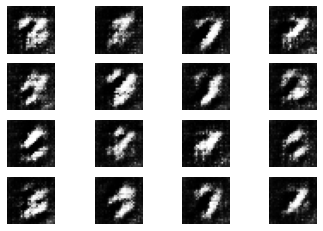

1/1 [==============================] - 0s 142ms/step
201 [D loss: 0.544028, acc.: 76.56%] [G loss: 0.917555]
1/1 [==============================] - 0s 146ms/step
202 [D loss: 0.512244, acc.: 79.69%] [G loss: 1.058174]
1/1 [==============================] - 0s 150ms/step
203 [D loss: 0.535241, acc.: 76.56%] [G loss: 1.119752]
1/1 [==============================] - 0s 154ms/step
204 [D loss: 0.596786, acc.: 64.06%] [G loss: 0.994450]
1/1 [==============================] - 0s 152ms/step
205 [D loss: 0.581363, acc.: 75.00%] [G loss: 1.043850]
1/1 [==============================] - 0s 150ms/step
206 [D loss: 0.600691, acc.: 71.88%] [G loss: 1.032439]
1/1 [==============================] - 0s 149ms/step
207 [D loss: 0.619255, acc.: 70.31%] [G loss: 1.023806]
1/1 [==============================] - 0s 142ms/step
208 [D loss: 0.680317, acc.: 60.94%] [G loss: 1.014336]
1/1 [==============================] - 0s 145ms/step
209 [D loss: 0.619132, acc.: 73.44%] [G loss: 0.951633]
1/1 [==============

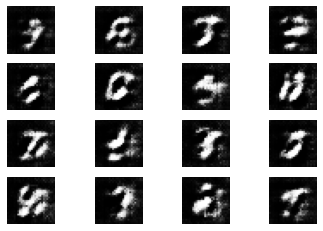

1/1 [==============================] - 0s 153ms/step
301 [D loss: 0.630867, acc.: 62.50%] [G loss: 0.950531]
1/1 [==============================] - 0s 151ms/step
302 [D loss: 0.578046, acc.: 71.88%] [G loss: 1.020402]
1/1 [==============================] - 0s 149ms/step
303 [D loss: 0.597977, acc.: 70.31%] [G loss: 0.981302]
1/1 [==============================] - 0s 148ms/step
304 [D loss: 0.575022, acc.: 71.88%] [G loss: 0.951155]
1/1 [==============================] - 0s 140ms/step
305 [D loss: 0.582290, acc.: 73.44%] [G loss: 0.981919]
1/1 [==============================] - 0s 144ms/step
306 [D loss: 0.588409, acc.: 67.19%] [G loss: 1.013991]
1/1 [==============================] - 0s 143ms/step
307 [D loss: 0.552625, acc.: 76.56%] [G loss: 0.984098]
1/1 [==============================] - 0s 142ms/step
308 [D loss: 0.589623, acc.: 75.00%] [G loss: 1.044147]
1/1 [==============================] - 0s 142ms/step
309 [D loss: 0.556036, acc.: 75.00%] [G loss: 1.056368]
1/1 [==============

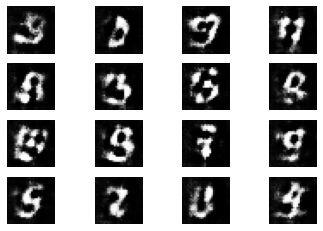

1/1 [==============================] - 0s 146ms/step
401 [D loss: 0.650254, acc.: 60.94%] [G loss: 0.851506]
1/1 [==============================] - 0s 151ms/step
402 [D loss: 0.710922, acc.: 59.38%] [G loss: 0.811313]
1/1 [==============================] - 0s 144ms/step
403 [D loss: 0.677835, acc.: 53.12%] [G loss: 0.783826]
1/1 [==============================] - 0s 143ms/step
404 [D loss: 0.679026, acc.: 57.81%] [G loss: 0.838963]
1/1 [==============================] - 0s 142ms/step
405 [D loss: 0.698789, acc.: 57.81%] [G loss: 0.786367]
1/1 [==============================] - 0s 142ms/step
406 [D loss: 0.621849, acc.: 67.19%] [G loss: 0.817490]
1/1 [==============================] - 0s 163ms/step
407 [D loss: 0.691125, acc.: 54.69%] [G loss: 0.758095]
1/1 [==============================] - 0s 154ms/step
408 [D loss: 0.639137, acc.: 57.81%] [G loss: 0.871834]
1/1 [==============================] - 0s 155ms/step
409 [D loss: 0.626410, acc.: 67.19%] [G loss: 0.844458]
1/1 [==============

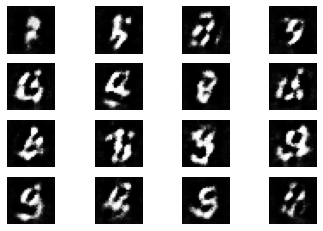

1/1 [==============================] - 0s 149ms/step
501 [D loss: 0.598392, acc.: 70.31%] [G loss: 0.830380]
1/1 [==============================] - 0s 150ms/step
502 [D loss: 0.610140, acc.: 76.56%] [G loss: 0.936199]
1/1 [==============================] - 0s 150ms/step
503 [D loss: 0.663726, acc.: 53.12%] [G loss: 0.896092]
1/1 [==============================] - 0s 146ms/step
504 [D loss: 0.654783, acc.: 64.06%] [G loss: 0.874645]
1/1 [==============================] - 0s 146ms/step
505 [D loss: 0.687036, acc.: 59.38%] [G loss: 0.829310]
1/1 [==============================] - 0s 144ms/step
506 [D loss: 0.700350, acc.: 50.00%] [G loss: 0.825167]
1/1 [==============================] - 0s 143ms/step
507 [D loss: 0.668320, acc.: 59.38%] [G loss: 0.795574]
1/1 [==============================] - 0s 147ms/step
508 [D loss: 0.694803, acc.: 59.38%] [G loss: 0.832584]
1/1 [==============================] - 0s 154ms/step
509 [D loss: 0.681300, acc.: 60.94%] [G loss: 0.892063]
1/1 [==============

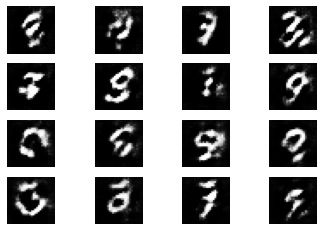

1/1 [==============================] - 0s 141ms/step
601 [D loss: 0.632335, acc.: 70.31%] [G loss: 0.888344]
1/1 [==============================] - 0s 143ms/step
602 [D loss: 0.636784, acc.: 65.62%] [G loss: 0.881670]
1/1 [==============================] - 0s 148ms/step
603 [D loss: 0.615516, acc.: 68.75%] [G loss: 0.870646]
1/1 [==============================] - 0s 143ms/step
604 [D loss: 0.626772, acc.: 65.62%] [G loss: 0.860175]
1/1 [==============================] - 0s 144ms/step
605 [D loss: 0.625129, acc.: 67.19%] [G loss: 0.951320]
1/1 [==============================] - 0s 142ms/step
606 [D loss: 0.640116, acc.: 67.19%] [G loss: 0.891793]
1/1 [==============================] - 0s 144ms/step
607 [D loss: 0.598378, acc.: 78.12%] [G loss: 0.924040]
1/1 [==============================] - 0s 156ms/step
608 [D loss: 0.609041, acc.: 73.44%] [G loss: 0.857185]
1/1 [==============================] - 0s 145ms/step
609 [D loss: 0.634524, acc.: 64.06%] [G loss: 0.923923]
1/1 [==============

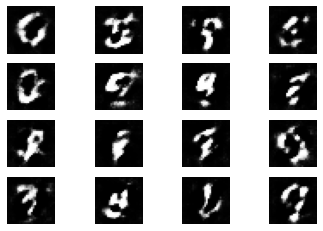

1/1 [==============================] - 0s 156ms/step
701 [D loss: 0.677400, acc.: 53.12%] [G loss: 0.854360]
1/1 [==============================] - 0s 162ms/step
702 [D loss: 0.626365, acc.: 67.19%] [G loss: 0.888854]
1/1 [==============================] - 0s 150ms/step
703 [D loss: 0.673390, acc.: 57.81%] [G loss: 0.915208]
1/1 [==============================] - 0s 148ms/step
704 [D loss: 0.729066, acc.: 53.12%] [G loss: 0.869683]
1/1 [==============================] - 0s 138ms/step
705 [D loss: 0.665112, acc.: 60.94%] [G loss: 0.813943]
1/1 [==============================] - 0s 140ms/step
706 [D loss: 0.658756, acc.: 60.94%] [G loss: 0.830038]
1/1 [==============================] - 0s 144ms/step
707 [D loss: 0.680994, acc.: 50.00%] [G loss: 0.829949]
1/1 [==============================] - 0s 143ms/step
708 [D loss: 0.676839, acc.: 60.94%] [G loss: 0.859242]
1/1 [==============================] - 0s 146ms/step
709 [D loss: 0.638452, acc.: 76.56%] [G loss: 0.834269]
1/1 [==============

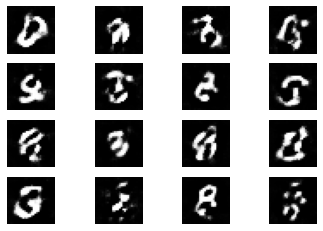

1/1 [==============================] - 0s 150ms/step
801 [D loss: 0.652043, acc.: 57.81%] [G loss: 0.875848]
1/1 [==============================] - 0s 144ms/step
802 [D loss: 0.648501, acc.: 70.31%] [G loss: 0.874763]
1/1 [==============================] - 0s 144ms/step
803 [D loss: 0.667990, acc.: 57.81%] [G loss: 0.844330]
1/1 [==============================] - 0s 153ms/step
804 [D loss: 0.681844, acc.: 51.56%] [G loss: 0.856179]
1/1 [==============================] - 0s 151ms/step
805 [D loss: 0.651502, acc.: 62.50%] [G loss: 0.848751]
1/1 [==============================] - 0s 146ms/step
806 [D loss: 0.677647, acc.: 54.69%] [G loss: 0.879626]
1/1 [==============================] - 0s 151ms/step
807 [D loss: 0.687376, acc.: 60.94%] [G loss: 0.811199]
1/1 [==============================] - 0s 150ms/step
808 [D loss: 0.646022, acc.: 62.50%] [G loss: 0.853740]
1/1 [==============================] - 0s 142ms/step
809 [D loss: 0.667974, acc.: 59.38%] [G loss: 0.847990]
1/1 [==============

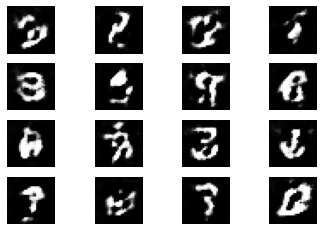

1/1 [==============================] - 0s 153ms/step
901 [D loss: 0.633445, acc.: 68.75%] [G loss: 0.858661]
1/1 [==============================] - 0s 153ms/step
902 [D loss: 0.627227, acc.: 68.75%] [G loss: 0.887450]
1/1 [==============================] - 0s 160ms/step
903 [D loss: 0.624956, acc.: 71.88%] [G loss: 0.897971]
1/1 [==============================] - 0s 149ms/step
904 [D loss: 0.644651, acc.: 67.19%] [G loss: 0.917498]
1/1 [==============================] - 0s 157ms/step
905 [D loss: 0.641685, acc.: 64.06%] [G loss: 0.861984]
1/1 [==============================] - 0s 140ms/step
906 [D loss: 0.661213, acc.: 62.50%] [G loss: 0.855144]
1/1 [==============================] - 0s 143ms/step
907 [D loss: 0.614618, acc.: 67.19%] [G loss: 0.874899]
1/1 [==============================] - 0s 140ms/step
908 [D loss: 0.631699, acc.: 67.19%] [G loss: 0.860015]
1/1 [==============================] - 0s 136ms/step
909 [D loss: 0.690205, acc.: 53.12%] [G loss: 0.905863]
1/1 [==============

In [2]:
class GAN():
    def __init__(self):
        self.IMG_HIGH = 28
        self.IMG_WIDTH = 28
        self.channel = 1
        self.img_shape = (self.IMG_HIGH, self.IMG_WIDTH, self.channel)

        optimizer = tf.keras.optimizers.Adam(0.0001, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build and compile the generator
        self.generator = self.build_generator()
        self.generator.compile(loss='binary_crossentropy', optimizer=optimizer)

        # The generator takes noise as input and generated imgs
        z = Input(shape=(100,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The valid takes generated images as input and determines validity
        valid = self.discriminator(img)

        # The combined model  (stacked generator and discriminator) takes
        # noise as input => generates images => determines validity
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    def build_generator(self):

        noise_shape = (100,)

        model = Sequential()



        model.add(Dense(7*7*256, use_bias=False, input_shape=(100,)))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Reshape((7, 7, 256)))
        assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

        model.add(Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
        assert model.output_shape == (None, 7, 7, 128)
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
        assert model.output_shape == (None, 14, 14, 64)
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
        assert model.output_shape == (None, 28, 28, 1)

        noise = Input(shape=noise_shape)
        img = model(noise)

        return Model(noise, img)

    def build_discriminator(self):

        img_shape = (self.IMG_HIGH, self.IMG_WIDTH, self.channel)

        model = Sequential()

        model.add(Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                        input_shape=[28, 28, 1]))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.3))

        model.add(Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.3))

        model.add(Flatten())
        model.add(Dense(1))

        img = Input(shape=img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, epochs, batch_size=128, save_interval=50):

        # Load the dataset
        (X_train, _), (_, _) = tf.keras.datasets.mnist.load_data()

        # Rescale -1 to 1
        X_train = (X_train.astype(np.float32) - 127.5) / 127.5
        X_train = np.expand_dims(X_train, axis=3)

        half_batch = int(batch_size / 2)

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random half batch of images
            idx = np.random.randint(0, X_train.shape[0], half_batch)
            imgs = X_train[idx]

            noise = np.random.normal(0, 1, (half_batch, 100))

            # Generate a half batch of new images
            gen_imgs = self.generator.predict(noise)

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(imgs, np.ones((half_batch, 1)))
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)


            # ---------------------
            #  Train Generator
            # ---------------------

            noise = np.random.normal(0, 1, (batch_size, 100))

            # The generator wants the discriminator to label the generated samples
            # as valid (ones)
            valid_y = np.array([1] * batch_size)

            # Train the generator
            g_loss = self.combined.train_on_batch(noise, valid_y)

            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

            # If at save interval => save generated image samples
            if epoch % save_interval == 0:
                self.plot_imgs(epoch)

    def plot_imgs(self, epoch):
        h, w = 4, 4
        noise = np.random.normal(0, 1, (h * w, 100))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(h, w)
        cnt = 0
        for i in range(h):
            for j in range(w):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        # fig.savefig("/content/gan_image/mnist_%d.png" % epoch)
        # plt.close()
        plt.show()


if __name__ == '__main__':
    gan = GAN()
    gan.train(epochs=1000, batch_size=64, save_interval=100)


1. I have trained the model for 1000 epochs and plotted the results for the interval of 100 epochs.

2. This project was for the MNIST data set, a one-channel image project. In the next step, I am going to do the same task for the image with three channels. After that, I aim to do more complicated models like pix2pix and cycleGAN.


